# General info
__Author__ = Reask <br>
__copyright__ = "Copyright 2024, Reask"

The script processes the sample trackset (120 years) and finds events at targets locations (latitude/longitude) defined by user user-defined <br>
Following are the items produced by this script: <br>
1. landfalling events at user-defined locations and intensity threshold
2. Exceedance probability of cyclone intensity


### Step1: Load Python packges 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
import glob as glob
from config import *

In [19]:
# converting search radius t0 km
srad *= 1.60934

def calc_d(lat,lon, plat,plon):
    dist = 111* np.sqrt(((lat-plat)**2) + ((lon-plon)**2))
    return dist

In [20]:
trackset = pd.read_csv(trackfile)

trackset["LON"] = (trackset["LON"] + 180) % 360 - 180

trackset["dist1"] = trackset.apply(lambda row: calc_d( row.LON, row.LAT, loc1[1], loc1[0]), axis=1 )

trackset["dist2"] = trackset.apply(lambda row: calc_d( row.LON, row.LAT, loc2[1], loc2[0]), axis=1 )

sids = trackset.loc[(trackset.dist1 < srad) & (trackset.Vm > 33)]['SID'].unique()
df = trackset.loc[trackset.SID.isin(sids)]

sids = df.loc[(df.dist2 < srad)]['SID'].unique()
df = trackset.loc[trackset.SID.isin(sids)]

SIDs = df.SID.unique()

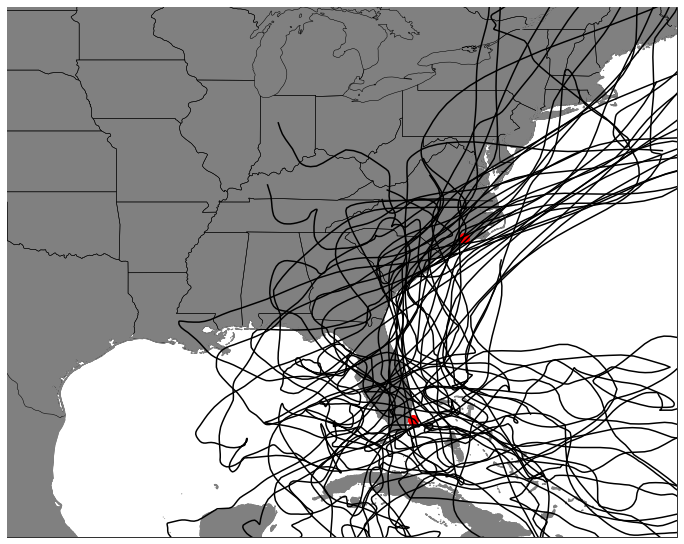

In [21]:
fig, ax = plt.subplots(figsize=(12, 12),
                    subplot_kw=dict(projection=ccrs.PlateCarree()))

extent = [-100, -67, 20, 45]

ax.add_feature(cfeature.STATES, zorder=6000, linewidth=0.5, edgecolor='k')

ax.set_extent(extent)
ax.coastlines('10m', color="grey", linewidth=1, zorder=6000, alpha=1)
ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='grey', zorder=100)

ax.scatter(loc1[1], loc1[0], color = 'r', s=100, zorder=6000)
ax.scatter(loc2[1], loc2[0], color = 'r', s=100, zorder=6000)

for ii in df.SID.unique() :
        b = df.loc[df.SID==ii].reset_index(drop=True)
        ax.plot(b.LON,b.LAT,color='k',zorder=6000)



In [22]:
myfiles = sorted(glob.glob('/home/balaji/Gitlab/trackset-analysis/clients/BoA/footprints/*.nc'))

ncfiles = []

for id in SIDs:
    dum = id.split('__')
    # break
    for file in myfiles:
        if (dum[1] in file) & (dum[2] in file) & (dum[3] in file):
            ncfiles.append(file.split('/')[-1])
            break

        
ncfiles

['NH_AT_v4.3.2__SOURCE_ERA5_NEW__ENS_RAN__Basin_AT__SubRegion_09__Season_2017__Sample_0001__Track_00000005.nc',
 'NH_AT_v4.3.2__SOURCE_ERA5_NEW__ENS_RAN__Basin_AT__SubRegion_08__Season_2012__Sample_0001__Track_00000001.nc',
 'NH_AT_v4.3.2__SOURCE_ERA5_NEW__ENS_RAN__Basin_AT__SubRegion_08__Season_2011__Sample_0002__Track_00000004.nc',
 'NH_AT_v4.3.2__SOURCE_ERA5_NEW__ENS_RAN__Basin_AT__SubRegion_08__Season_2010__Sample_0002__Track_00000006.nc',
 'NH_AT_v4.3.2__SOURCE_ERA5_NEW__ENS_RAN__Basin_AT__SubRegion_08__Season_2010__Sample_0003__Track_00000003.nc',
 'NH_AT_v4.3.2__SOURCE_ERA5_NEW__ENS_RAN__Basin_AT__SubRegion_09__Season_2010__Sample_0002__Track_00000028.nc',
 'NH_AT_v4.3.2__SOURCE_ERA5_NEW__ENS_RAN__Basin_AT__SubRegion_09__Season_2010__Sample_0003__Track_00000019.nc',
 'NH_AT_v4.3.2__SOURCE_ERA5_NEW__ENS_RAN__Basin_AT__SubRegion_10__Season_2010__Sample_0001__Track_00000025.nc',
 'NH_AT_v4.3.2__SOURCE_ERA5_NEW__ENS_RAN__Basin_AT__SubRegion_09__Season_2005__Sample_0002__Track_000000